In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as plotl
import plotly.graph_objs as go
import plotly.tools as tls
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(color_codes=True)
plt.style.use('ggplot')
#http://stackoverflow.com/questions/27504870/sklearn-kmeans-get-class-centroid-labels-and-reference-to-a-dataset
#http://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/

In [43]:
data_from_json = pd.read_json('prepped-wo-section.json')
data_to_frame = pd.DataFrame(data_from_json)
#data_to_frame = data_to_frame.fillna(-1)
data_to_frame.head(10)

,avg_incomplete,avg_score,avg_words_saved,num_words_saved,postId,user,video_vocab_count
0,0.000000,92.000000,0.104839,26,3913,50679,248
1,0.000000,93.333333,0.098039,15,5186,50679,153
2,0.000000,90.142857,0.165533,73,4974,50679,441
3,0.000000,90.166667,0.121673,32,4802,50679,263
4,0.000000,93.857143,0.104101,33,3711,50679,317
5,0.000000,92.000000,0.127820,17,5881,50679,133
6,0.333333,78.000000,0.138686,19,7126,50679,137
7,1.000000,NaN,0.142349,40,5797,50679,281
8,0.000000,82.200000,0.221774,55,3913,22808,248
9,0.000000,76.857143,0.293375,93,3711,22808,317


In [44]:
# Initialize the model with 2 parameters -- number of clusters and random state.
kmeans_model = KMeans(n_clusters=3, random_state=1)
# Get only the numeric columns from games.
data_to_frame = data_to_frame[data_to_frame['postId'] != 3913]
good_columns = data_to_frame[['avg_incomplete']] #data_to_frame._get_numeric_data()

# Fit the model using the good columns.
kmeans_model.fit(good_columns)
# Get the cluster assignments.
labels = kmeans_model.labels_

# Create a PCA model.
#pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
#plot_columns = pca_2.fit_transform(good_columns)
# Make a scatter plot of each game, shaded according to cluster assignment.
#plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.

df_processed = data_to_frame.copy()
df_processed['Cluster_Class'] = pd.Series(labels, index=df_processed.index)
df_processed.head(10)

,avg_incomplete,avg_score,avg_words_saved,num_words_saved,postId,user,video_vocab_count,Cluster_Class
1,0.000000,93.333333,0.098039,15,5186,50679,153,0
2,0.000000,90.142857,0.165533,73,4974,50679,441,0
3,0.000000,90.166667,0.121673,32,4802,50679,263,0
4,0.000000,93.857143,0.104101,33,3711,50679,317,0
5,0.000000,92.000000,0.127820,17,5881,50679,133,0
6,0.333333,78.000000,0.138686,19,7126,50679,137,2
7,1.000000,NaN,0.142349,40,5797,50679,281,1
9,0.000000,76.857143,0.293375,93,3711,22808,317,0
10,0.000000,86.333333,0.124183,19,5186,22808,153,0
11,0.000000,66.000000,0.217391,25,4165,22808,115,0


Cluster_Class
0    46144
1     4187
2     1569
dtype: int64


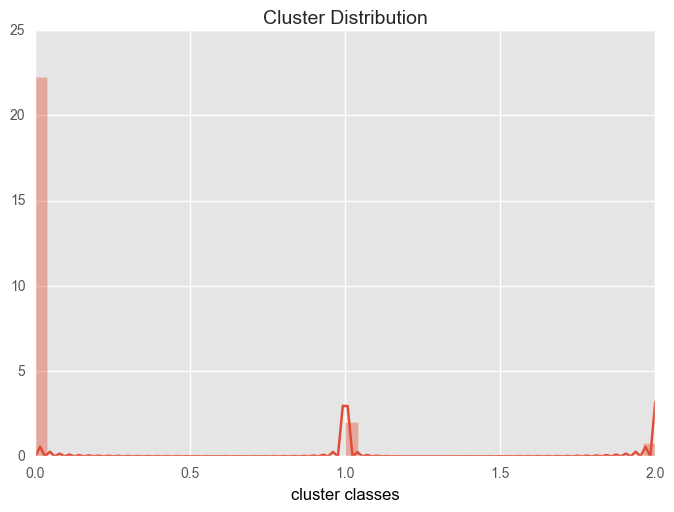

In [91]:
print df_processed.groupby(['Cluster_Class']).size()

c1 = sns.distplot(df_processed['Cluster_Class'])
c1.axes.set_title('Cluster Distribution', fontsize=14)
c1.set_xlabel("cluster classes",color="black")

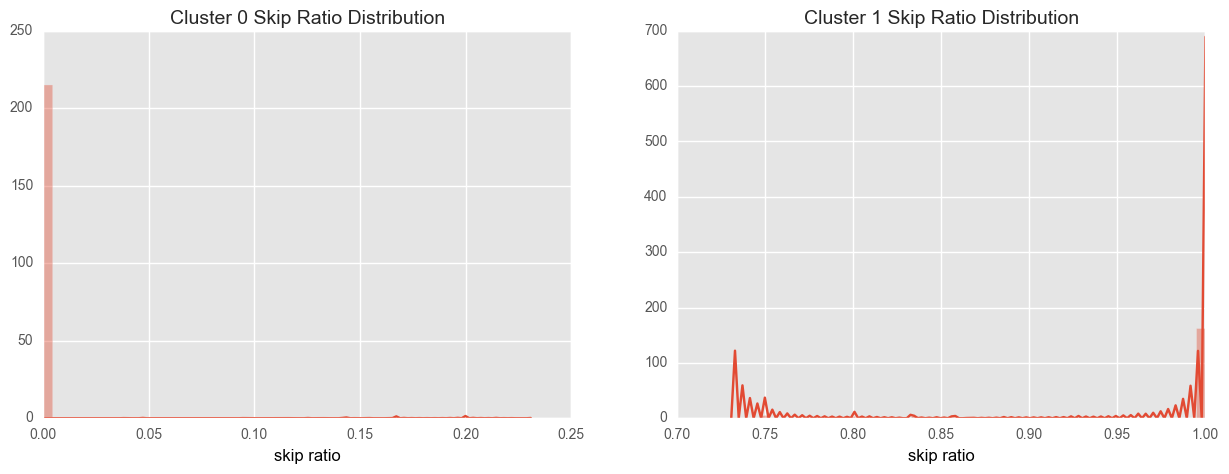

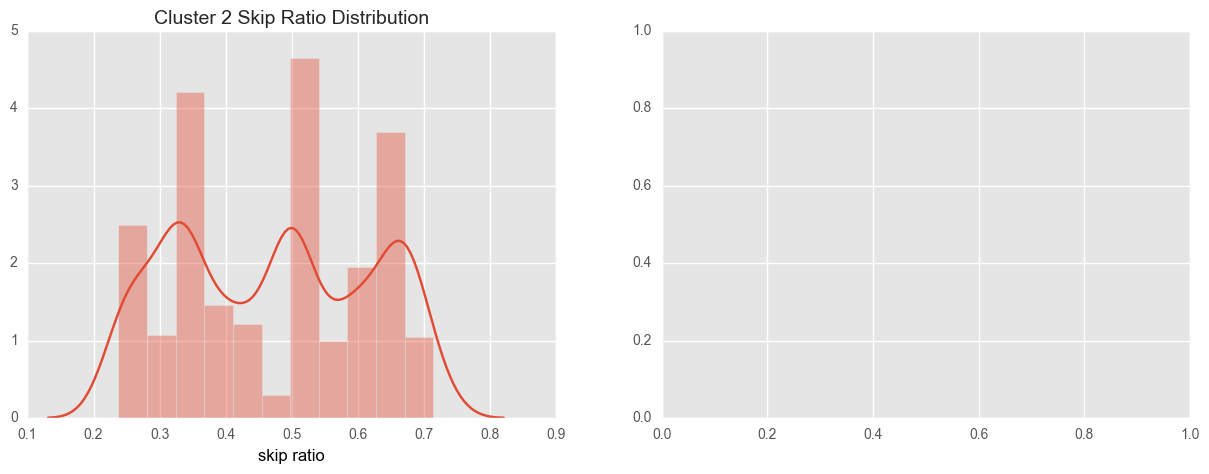

In [90]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))
fig2, axs2 = plt.subplots(1,2,figsize=(15, 5))

df_processed_cluster0 = df_processed[df_processed['Cluster_Class'] == 0]
c0 = sns.distplot(df_processed_cluster0['avg_incomplete'], ax=axs[0])
c0.axes.set_title('Cluster 0 Skip Ratio Distribution', fontsize=14)
c0.set_xlabel("skip ratio",color="black")

df_processed_cluster1 = df_processed[df_processed['Cluster_Class'] == 1]
c1 = sns.distplot(df_processed_cluster1['avg_incomplete'], ax=axs[1])
c1.axes.set_title('Cluster 1 Skip Ratio Distribution', fontsize=14)
c1.set_xlabel("skip ratio",color="black")

df_processed_cluster2 = df_processed[df_processed['Cluster_Class'] == 2]
c2 = sns.distplot(df_processed_cluster2['avg_incomplete'],ax=axs2[0])
c2.axes.set_title('Cluster 2 Skip Ratio Distribution', fontsize=14)
c2.set_xlabel("skip ratio",color="black")